# CNN

## Simple Example

In [11]:
##IMPORTS
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F    
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [12]:
def outputsize(inputsize, padding, kernel, stride):
    return (inputsize+2*padding-kernel) / (stride) +1

outputsize(28, 1, 3, 1)

28.0

In [24]:
class CNN(nn.Module):
    def __init__(self, in_channels = 1 , num_classes = 10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1,
                                    out_channels = 8,
                                    kernel_size = (3,3),
                                    stride = (1,1),
                                    padding = (1,1) )
        self.pool = nn.MaxPool2d(kernel_size = (2,2), stride = (2,2) )
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels =16,kernel_size = (3,3),stride = (1,1),padding = (1,1))
        self.fc1 = nn.Linear(16*7*7, num_classes)
            
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        return x        

In [39]:
## CHECKING MODEL WITH A RANDOM TENSOR
model = CNN().cuda()
x = torch.rand(64,1,28,28).cuda()  #(No. of images(mini-batch size) , No. of Features)\
print(model(x).shape)

torch.Size([64, 10])


In [33]:
## SET DEVICE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [41]:
## HYPER PARAMETERS
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 1

In [42]:
## LOAD DATA
train_dataset = datasets.MNIST(root = 'Dataset/', train = True, transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(dataset = train_dataset , batch_size = batch_size , shuffle = True)

test_dataset = datasets.MNIST(root = 'Dataset/', train = False, transform = transforms.ToTensor(), download = True)
test_loader = DataLoader(dataset = test_dataset , batch_size = batch_size , shuffle = True)

In [43]:
## LOSS FUNCTION AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [44]:
##TRAIN NETWORK
for epoch in range(num_epochs):  #1 epoch = network has seen all images
    for bath_idx ,(data,targets) in enumerate(train_loader):       #go through batches in train loader
        
        data = data.to(device = device)
        targets = targets.to(device = device)
        
        #Forward
        scores = model(data)
        loss = criterion(scores, targets)
        
        #Backward
        optimizer.zero_grad()  #Set all gradieents to zero to prevent accumulation
        loss.backward()
        
        #Gradient Descnet/ adam step
        optimizer.step()      #Update model parameters using gradients

In [45]:
## Check accuracy on train and test set:
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking Accuracy on Training Data")
    else:
        print("Checking accuracy on Test Data")
    
    num_correct = 0
    num_samples = 0
    model.eval()    #Evaluation Mode
    
    with torch.no_grad():
        for x,y in loader:
            x = x.to(device = device)
            y = y.to(device = device)

            
            scores = model(x)  #shape = (64, 10)                             (64, 10)
            _, predictions =  scores.max(1)  #maximum in 1st dimension (i.e max in 10's diemnsion)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)  #i.e 64
            
        acc = (float(num_correct)/float(num_samples))* 100
        print(f'Got {num_correct}/{num_samples} with accuracy {acc:.2f} %')           

In [46]:
check_accuracy(train_loader, model)

Checking Accuracy on Training Data
Got 58180/60000 with accuracy 96.97 %


In [47]:
check_accuracy(test_loader, model)

Checking accuracy on Test Data
Got 9711/10000 with accuracy 97.11 %


## Simple CNN for MNIST

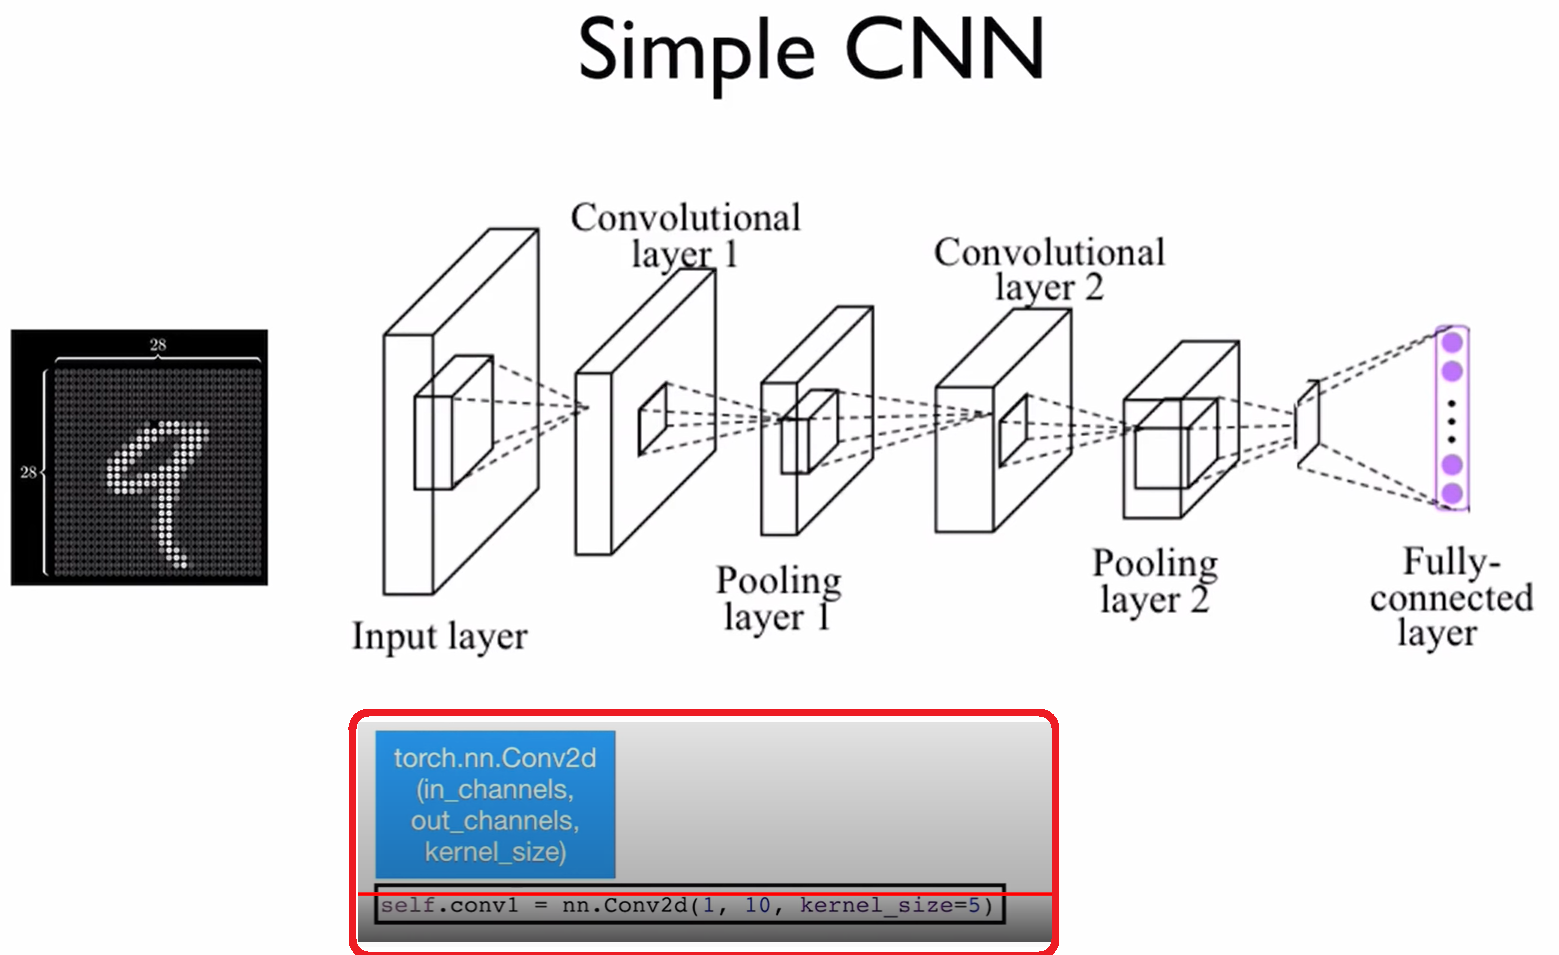

``` python
nn.Conv2d(number_of_input_channels,  #Ex: For grey Scale = 1, for RGB = 3
          number_of_output_channels, #Ex: Number of Feature maps
          kernel_size=5)      #Ex: 5 x 5 kernel

```

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch.utils import data
from torch import cuda

In [566]:
##DATA LOADER

# Training settings
batch_size = 64

device = 'cuda' if cuda.is_available() else 'cpu'

print(f'Training MNIST Model on {device}\n{"=" * 44}')

# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Training MNIST Model on cuda


In [596]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  #MNIST is grey scale , this 1 channel
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)  #10 possible outputs (!!!!!!!!!HOW TO CALCUL:ATE THIS 320???)
                                    #INput any random number and run the model, you'll get an error

    def forward(self, x):
        in_size = x.size(0)  #BATCH SIZE
        x = F.relu(self.mp(self.conv1(x)))  #Conv - > Max Pooling - > RELU
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor before passing into Fully connected Layer
                                #rows = batches , columns = Falttened Tensor
        x = self.fc(x)
        return F.log_softmax(x) #Log Softmax

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>How to Find the DImension of the last layer before final output ?? </b> <br>
    - Keep any randoim number and run the model , you'll get a size mismatch erro , use that number (CORRECT VALUE)

</p>

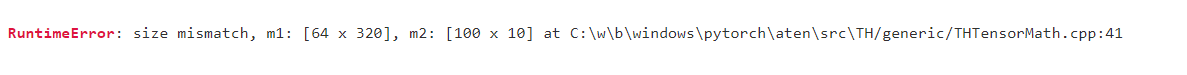

- <b> NOTE: [64 x 320] [100 x 10] , thus the correct value is 320!!!!!!!!!

In [597]:
model = Net()

In [598]:
print(model)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)


In [599]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [600]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [601]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [602]:
for epoch in range(1, 2):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315165


C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [640/60000 (1%)]	Loss: 2.282015
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.316878
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.281131
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.263057
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.245553
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.267828
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.236537
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.231799
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.220922
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.175417
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.113144
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.035370
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.953621
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.886160
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.651179
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.498149
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.078653
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.037557
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.925332
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.836962
Train Epoch: 1 [13440/60

C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
C:\Users\Ashwin\Miniconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1898, Accuracy: 9416/10000 (94%)



## INCEPTION MODULE

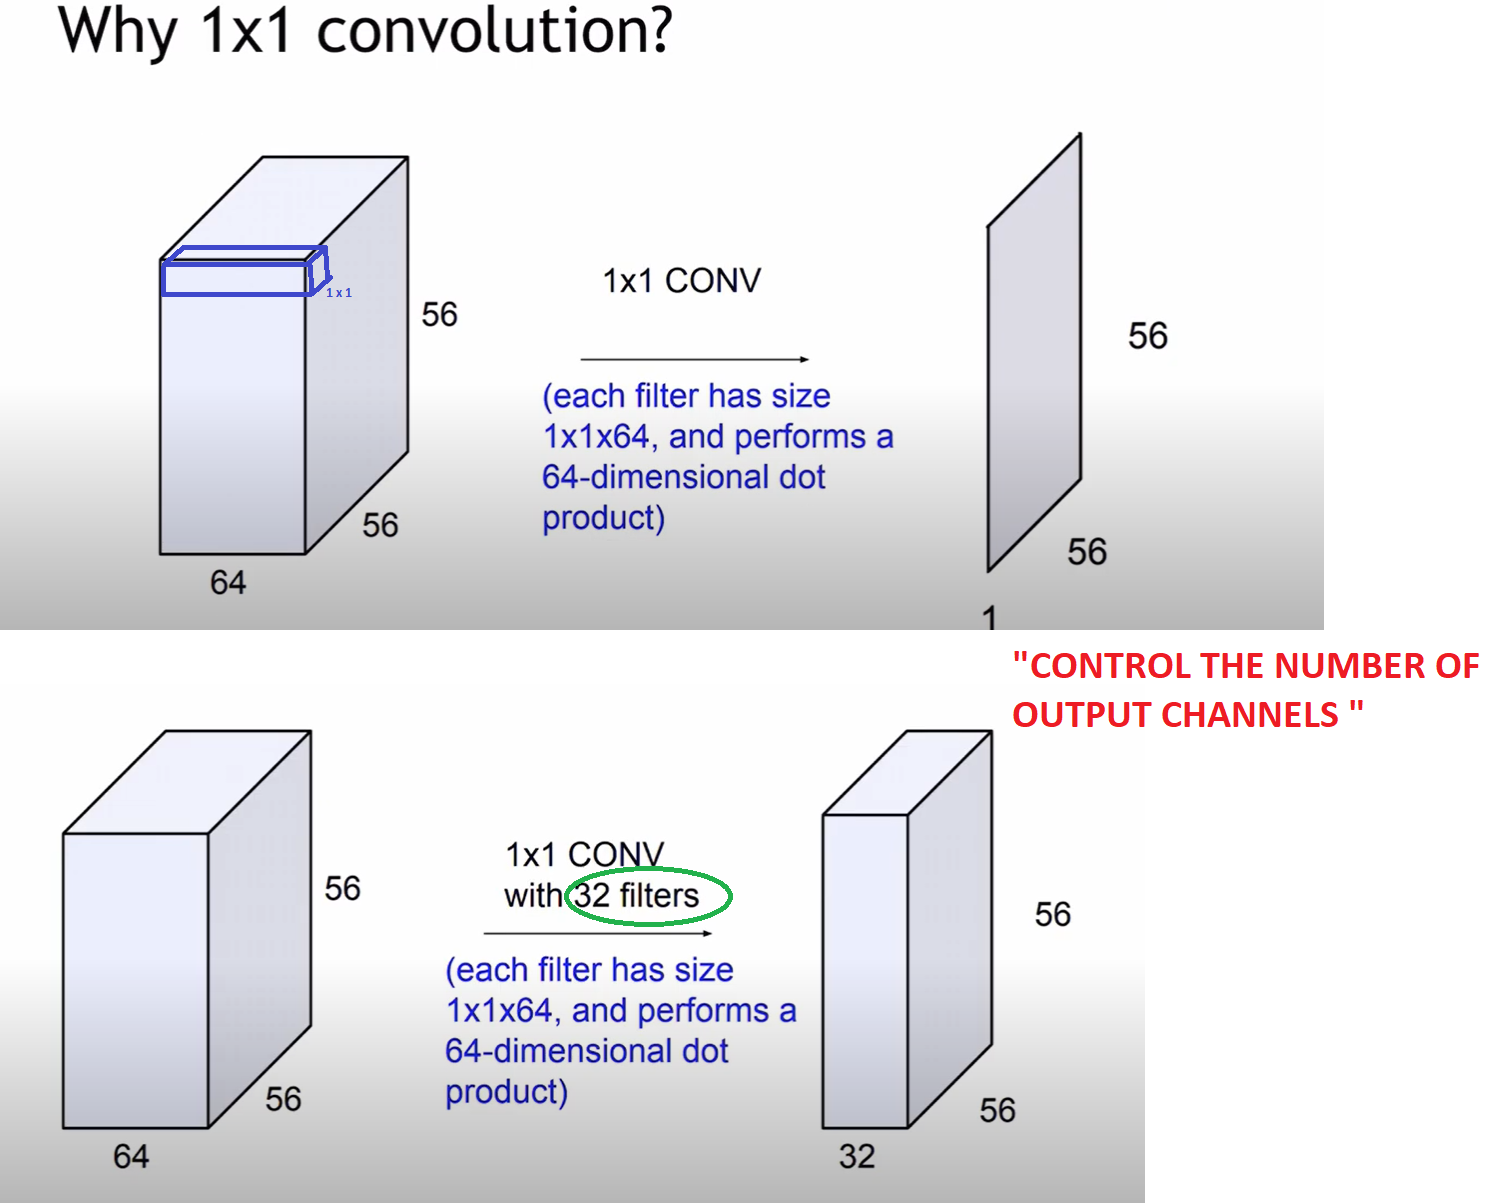

<b> Why Use Inception Model ?</b> 
- SIgnificant Reduction in number of computations

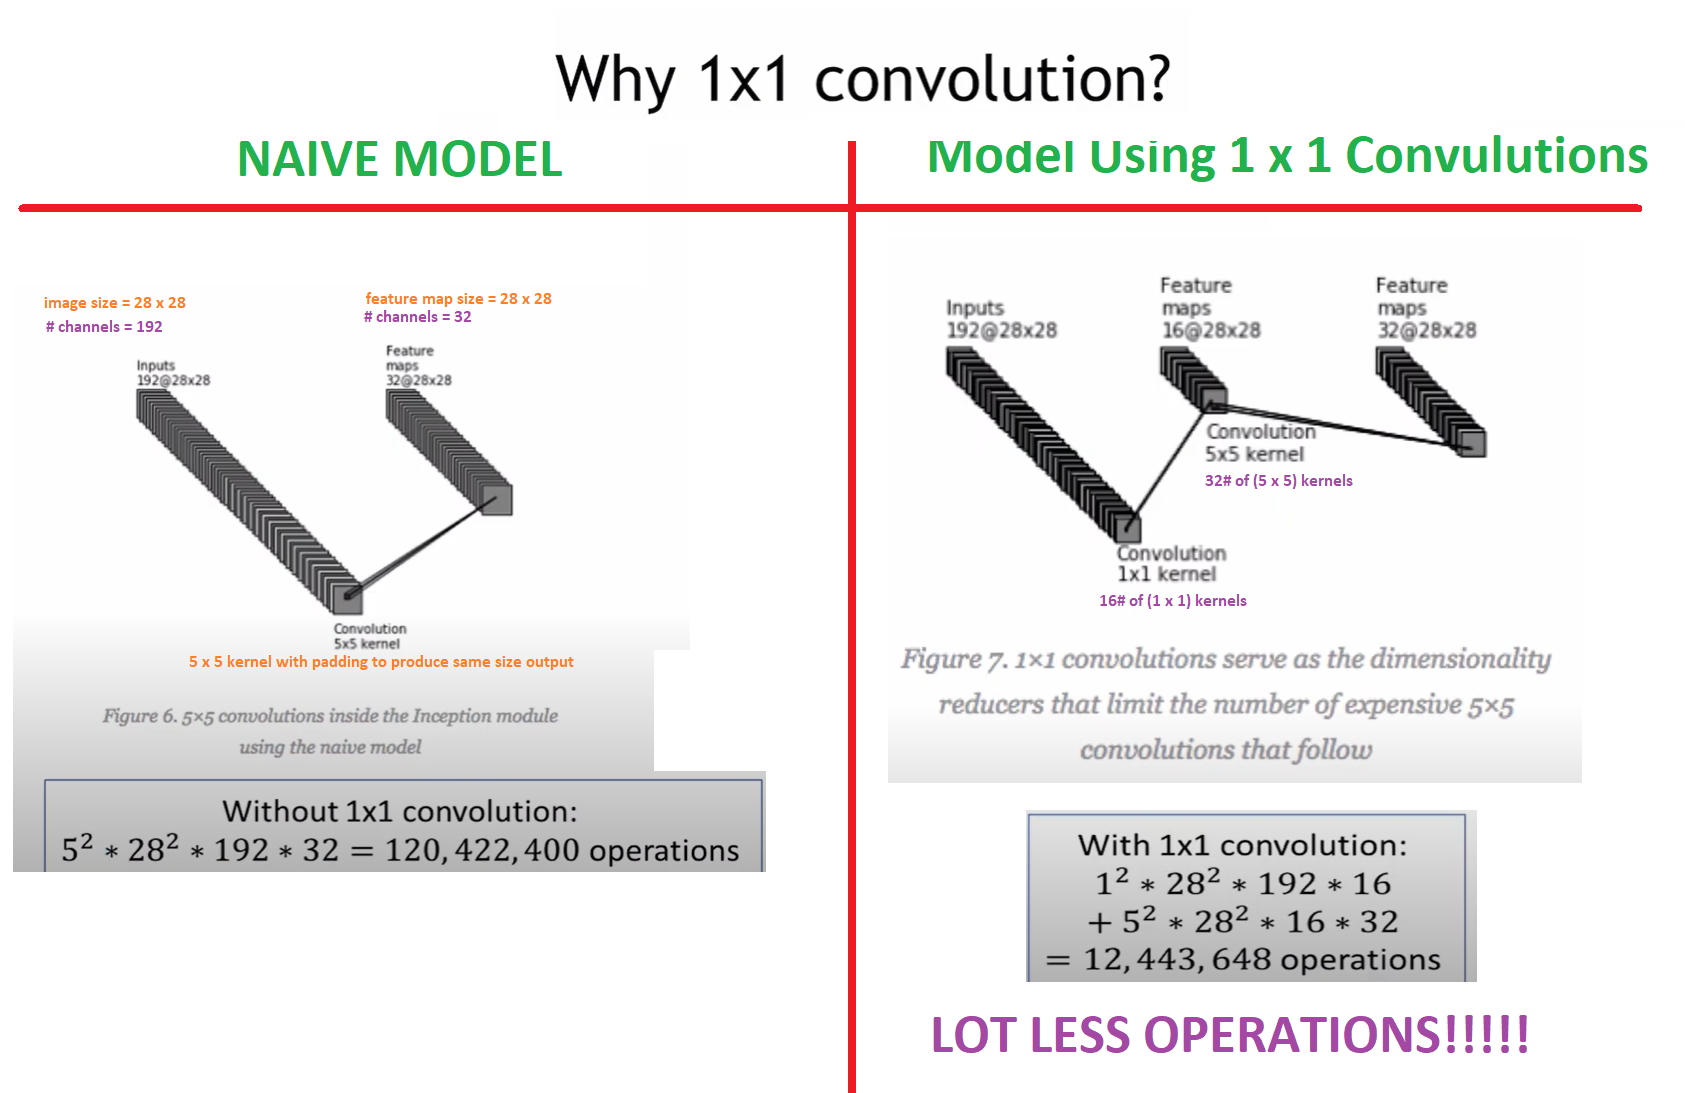

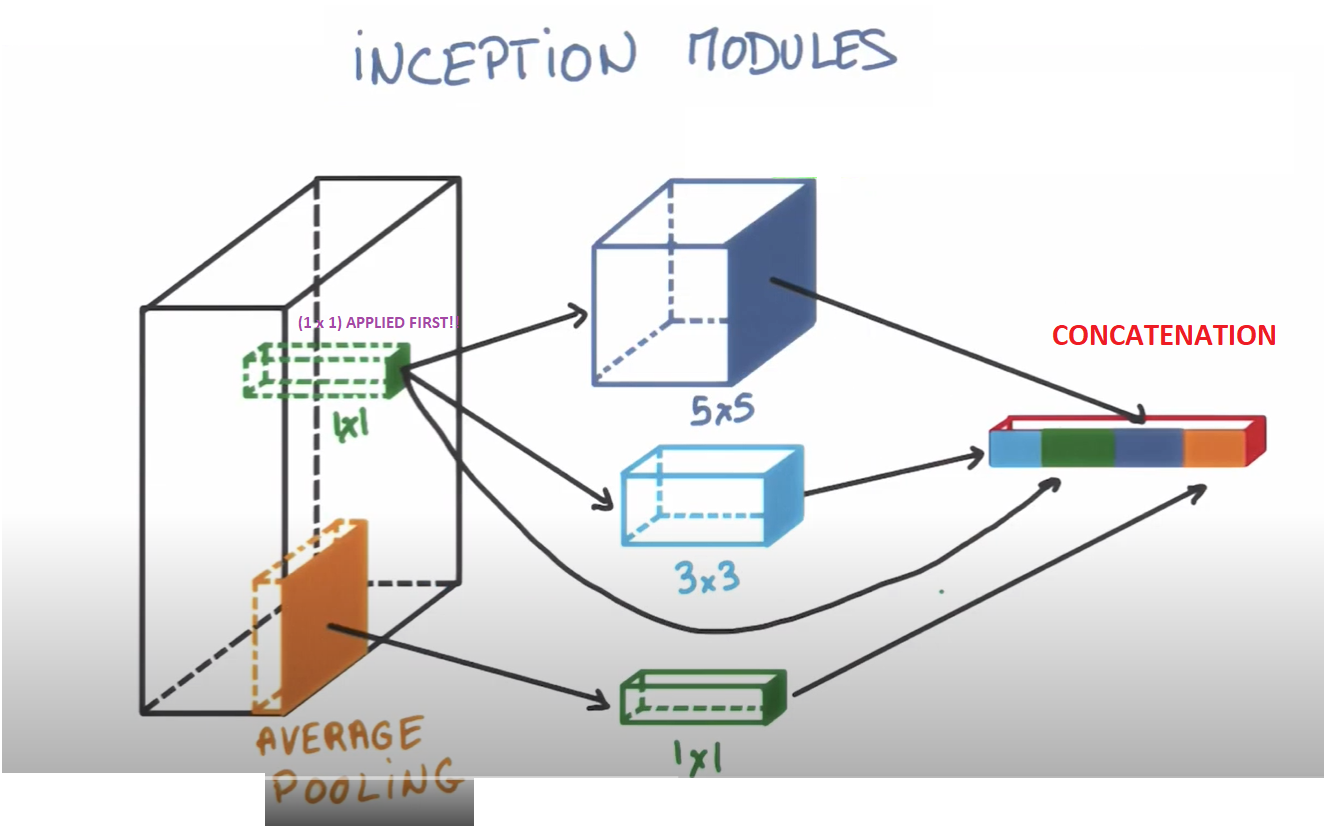

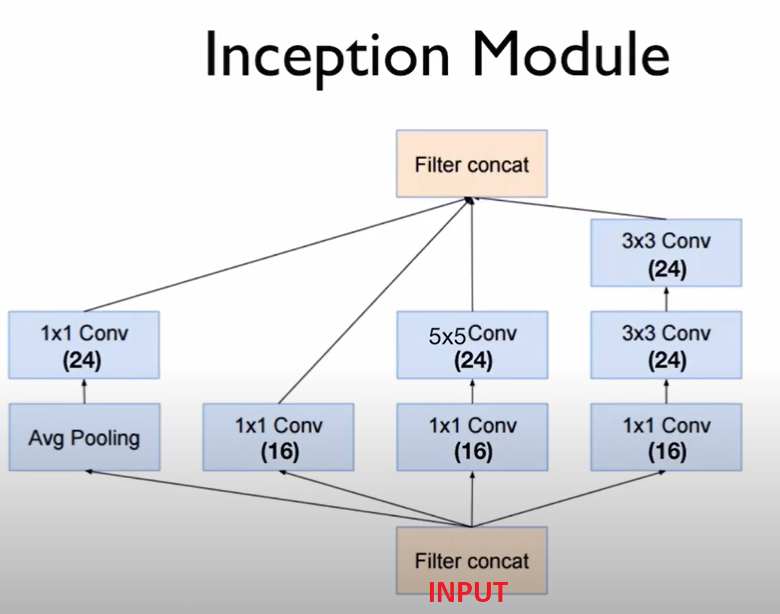

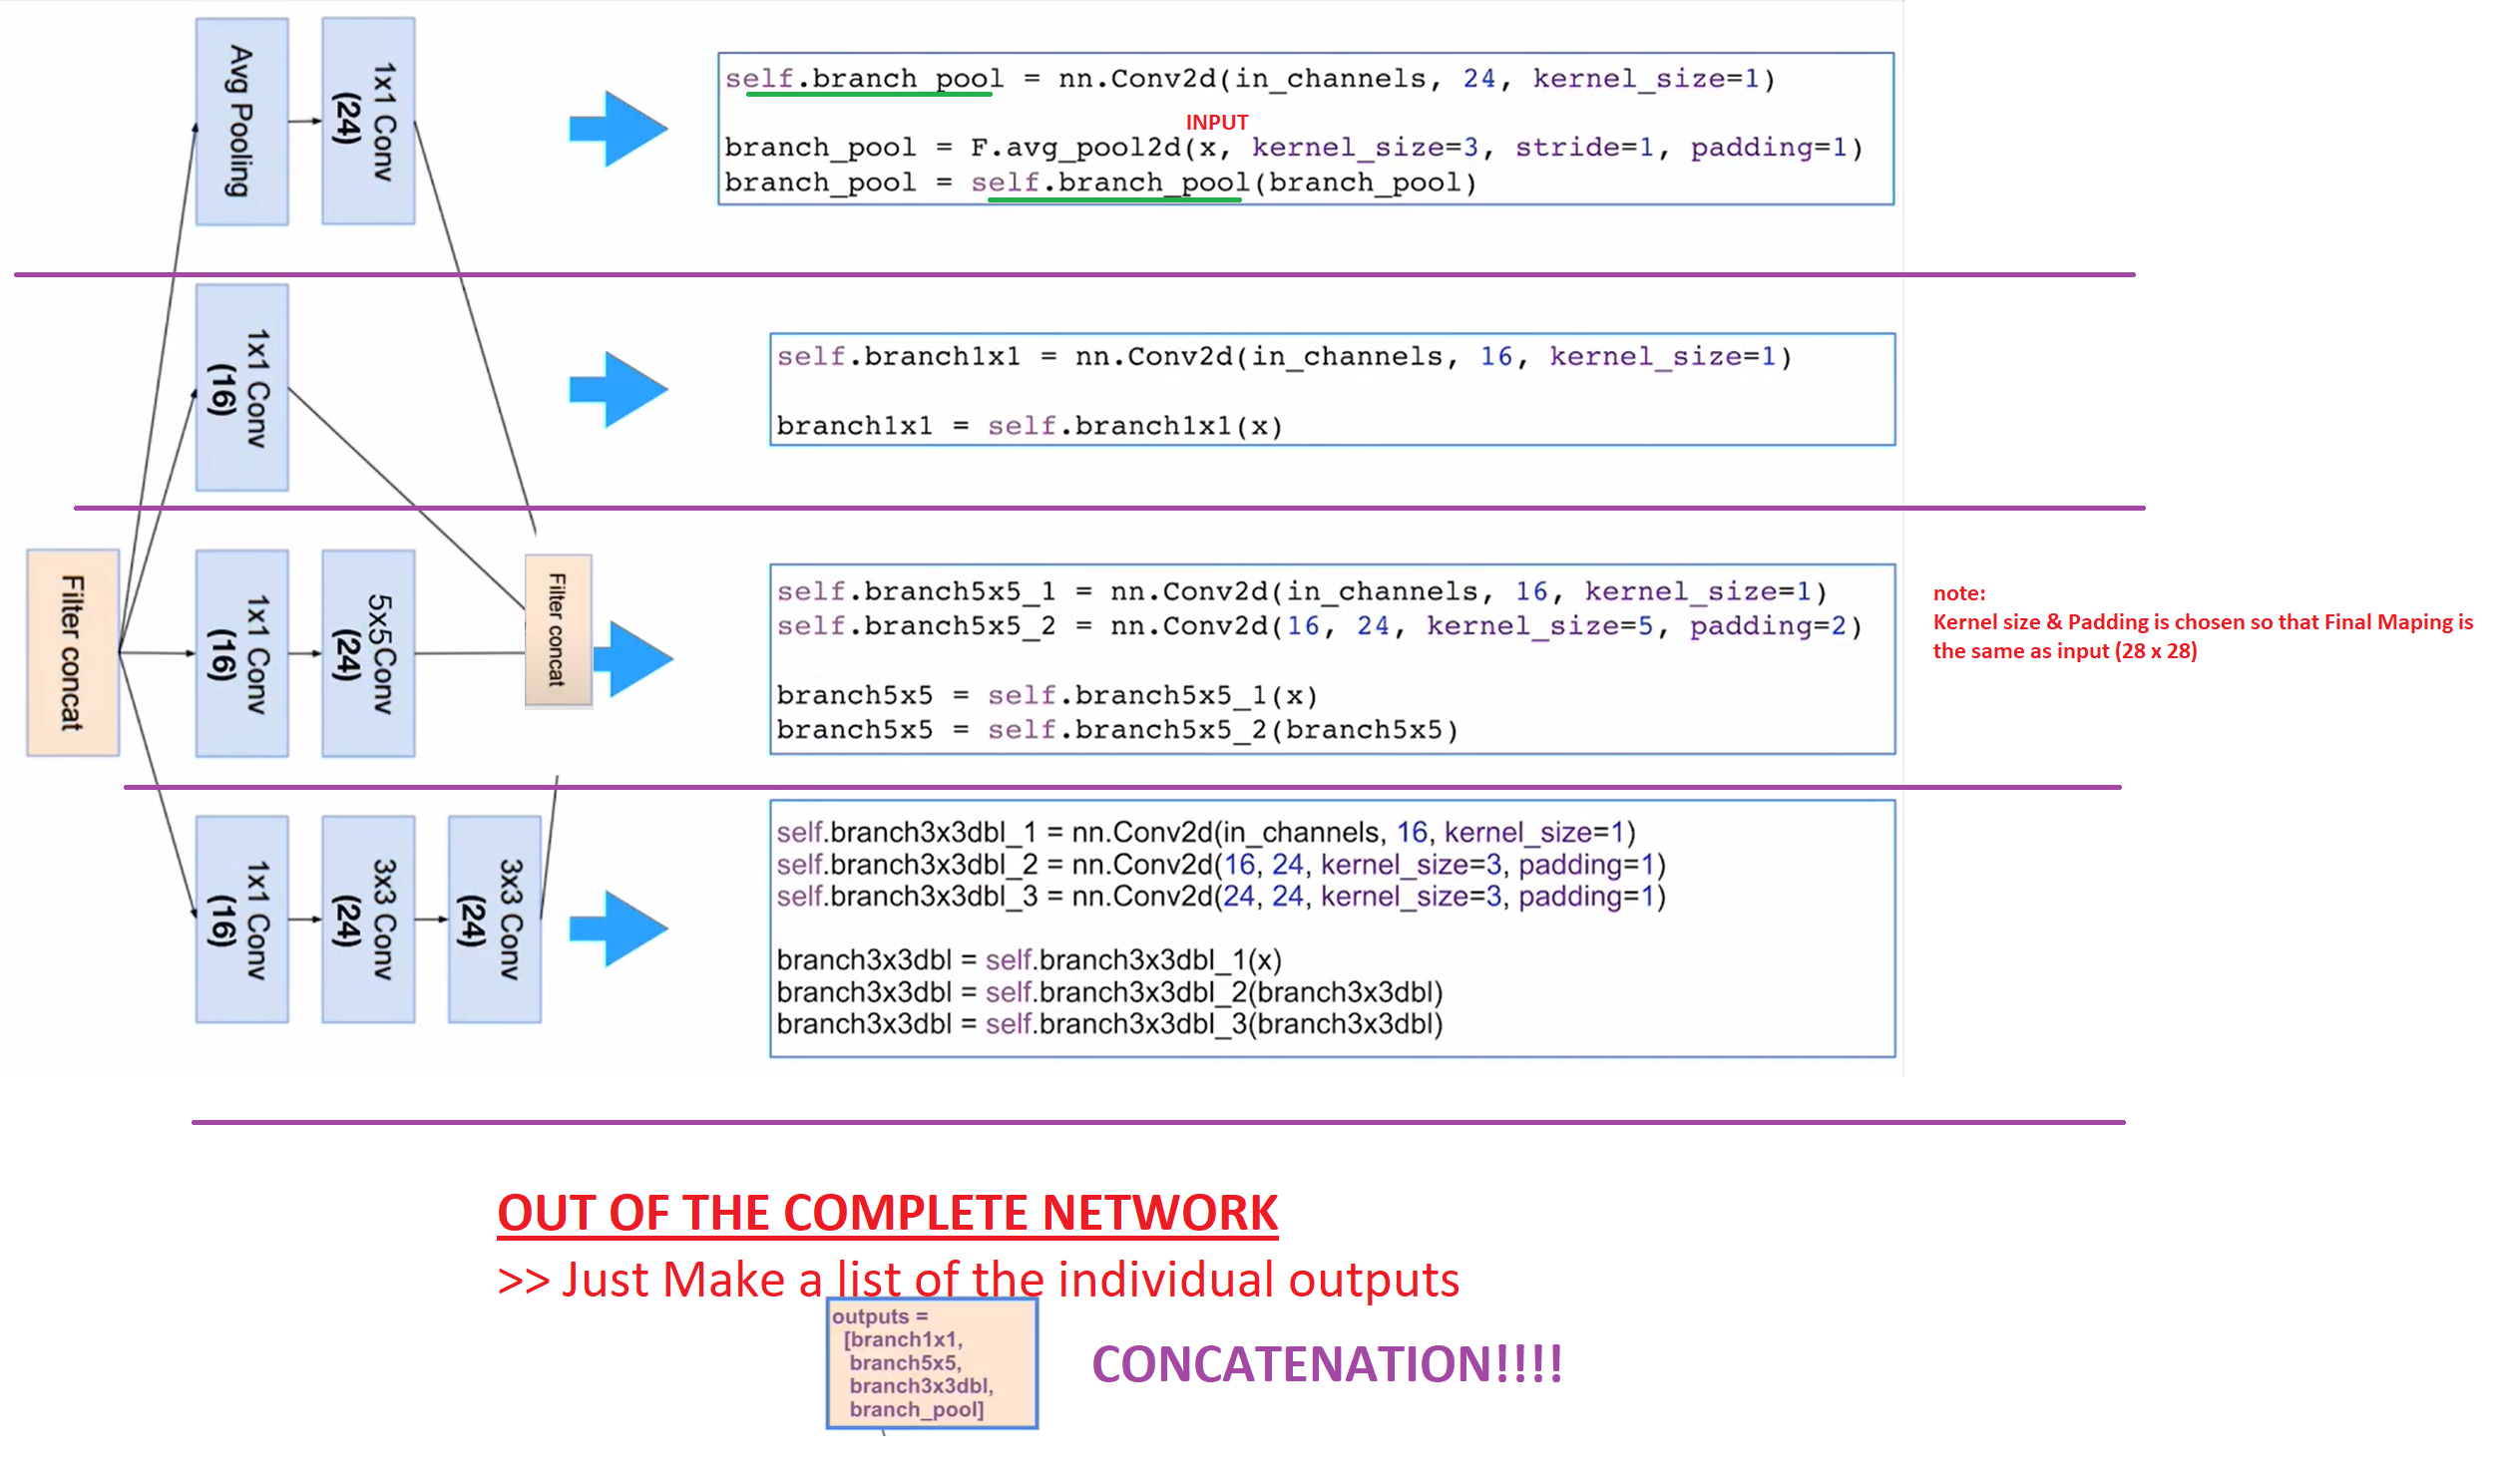

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>NOTE: When we have a complicated model, split in to two seperate classes for simplicity</b> 

</p>

In [614]:
## DAT A LOADER
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

0it [00:00, ?it/s]

9920512it [00:01, 6920092.32it/s]                             


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw


0it [00:00, ?it/s]

32768it [00:00, 106294.71it/s]           
0it [00:00, ?it/s]

Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw


1654784it [00:00, 2068379.65it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw


8192it [00:00, 8327.52it/s]             


Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw
Processing...
Done!


In [615]:
class InceptionA(nn.Module):

    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = nn.Conv2d(24, 24, kernel_size=3, padding=1)

        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)

In [616]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(88, 20, kernel_size=5)

        self.incept1 = InceptionA(in_channels=10)
        self.incept2 = InceptionA(in_channels=20)

        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(1408, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)

In [617]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [624]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        #if batch_idx % 10 == 0:
            #print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
               # epoch, batch_idx * len(data), len(train_loader.dataset),
               # 100. * batch_idx / len(train_loader), loss.data[0]))

In [627]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).item()
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [628]:
for epoch in range(1, 2):
    train(epoch)
    test()

C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  



Test set: Average loss: 0.1103, Accuracy: 9632/10000 (96%)



## Depth Of Network? (Res-Net)

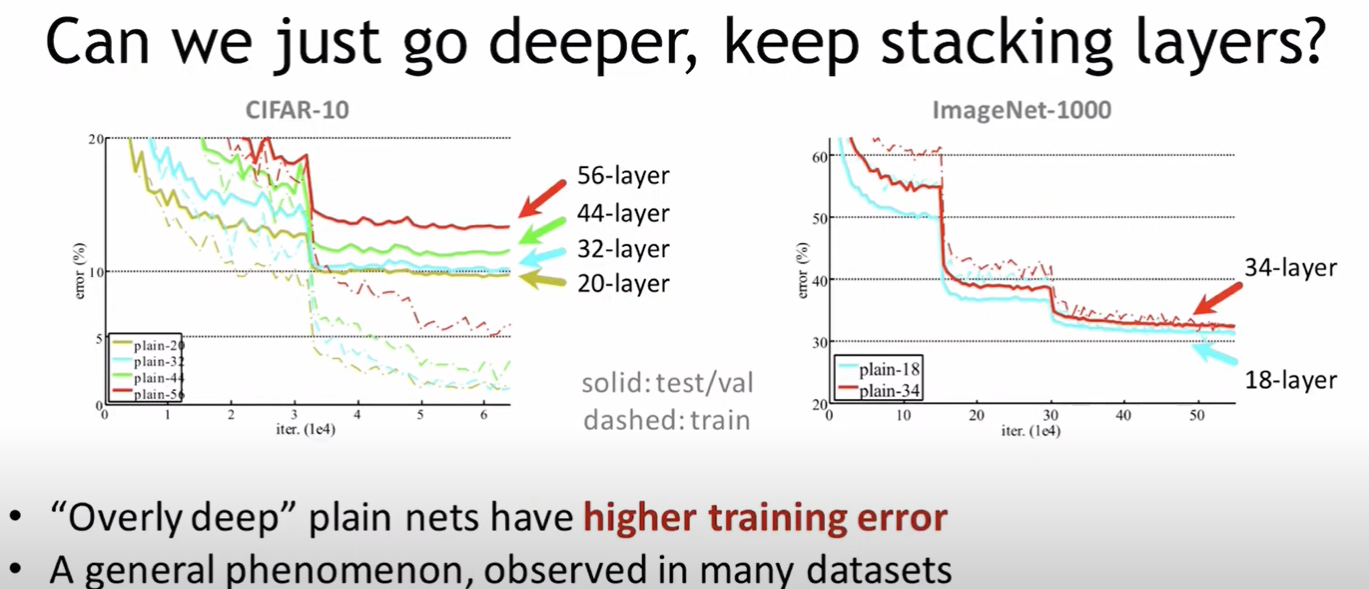

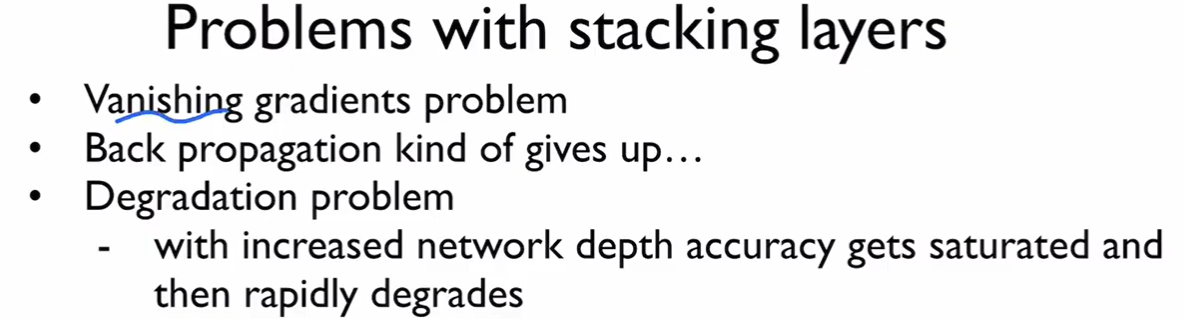

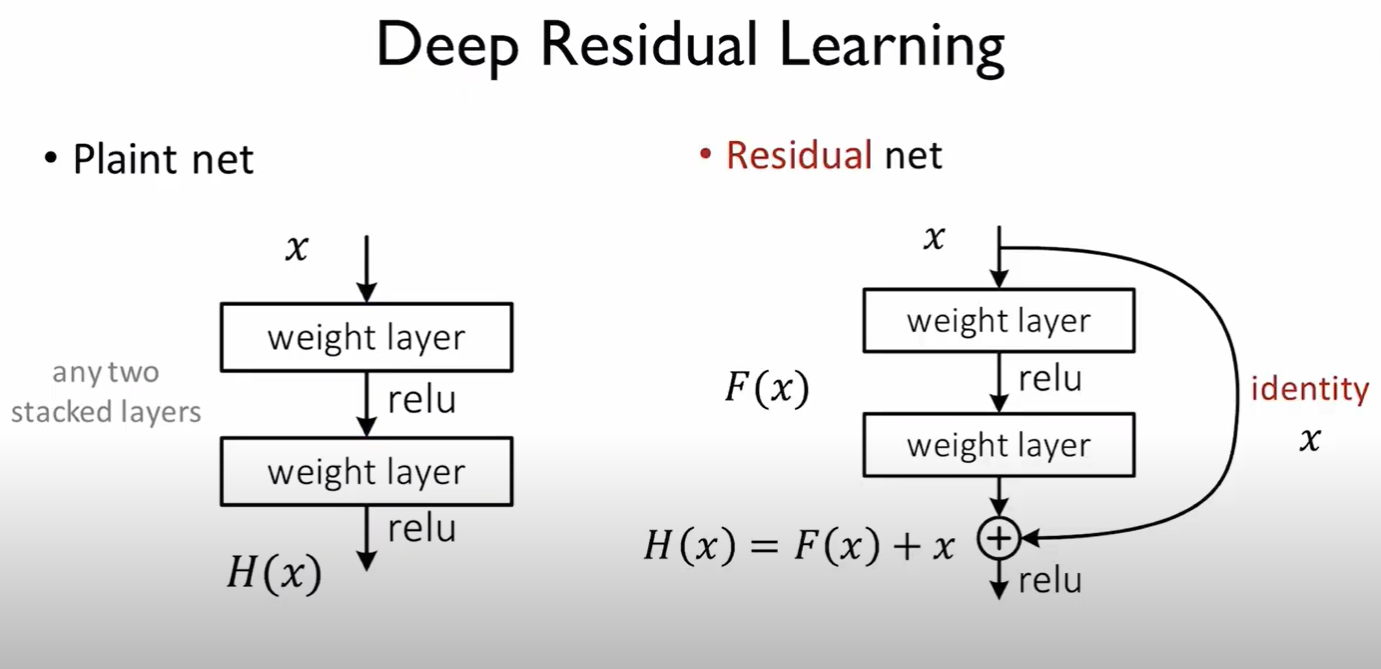

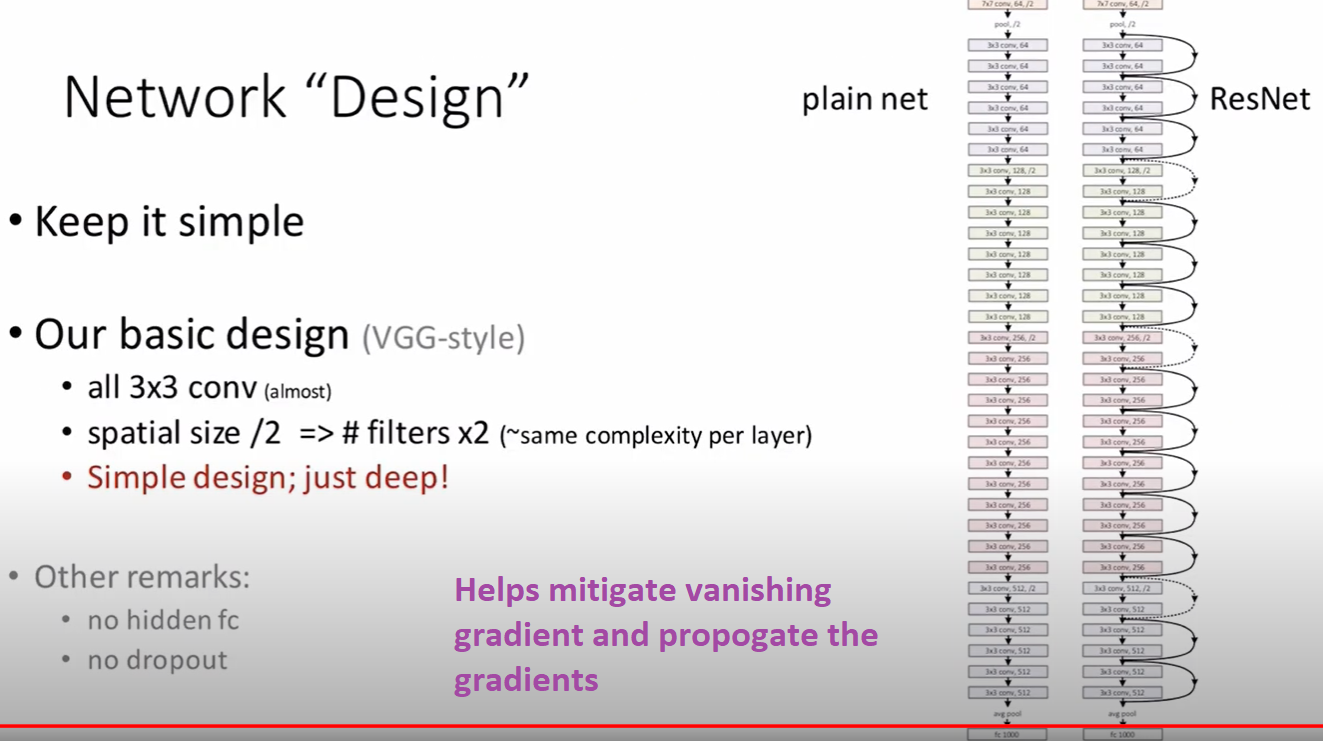

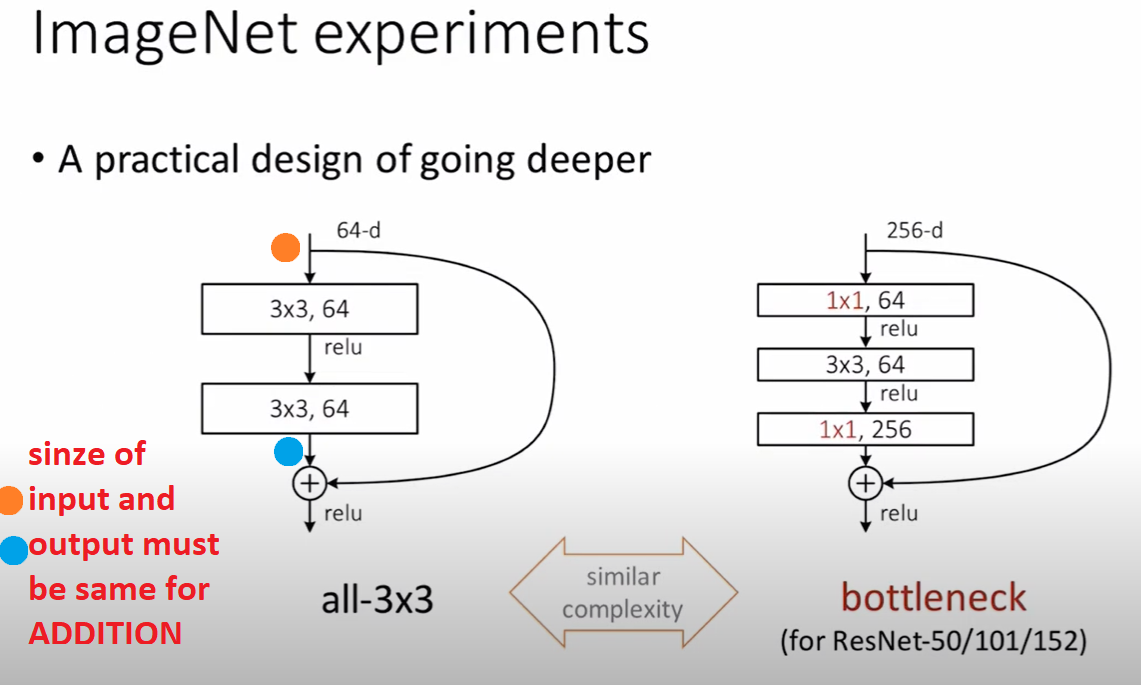

## Convolutional Operator

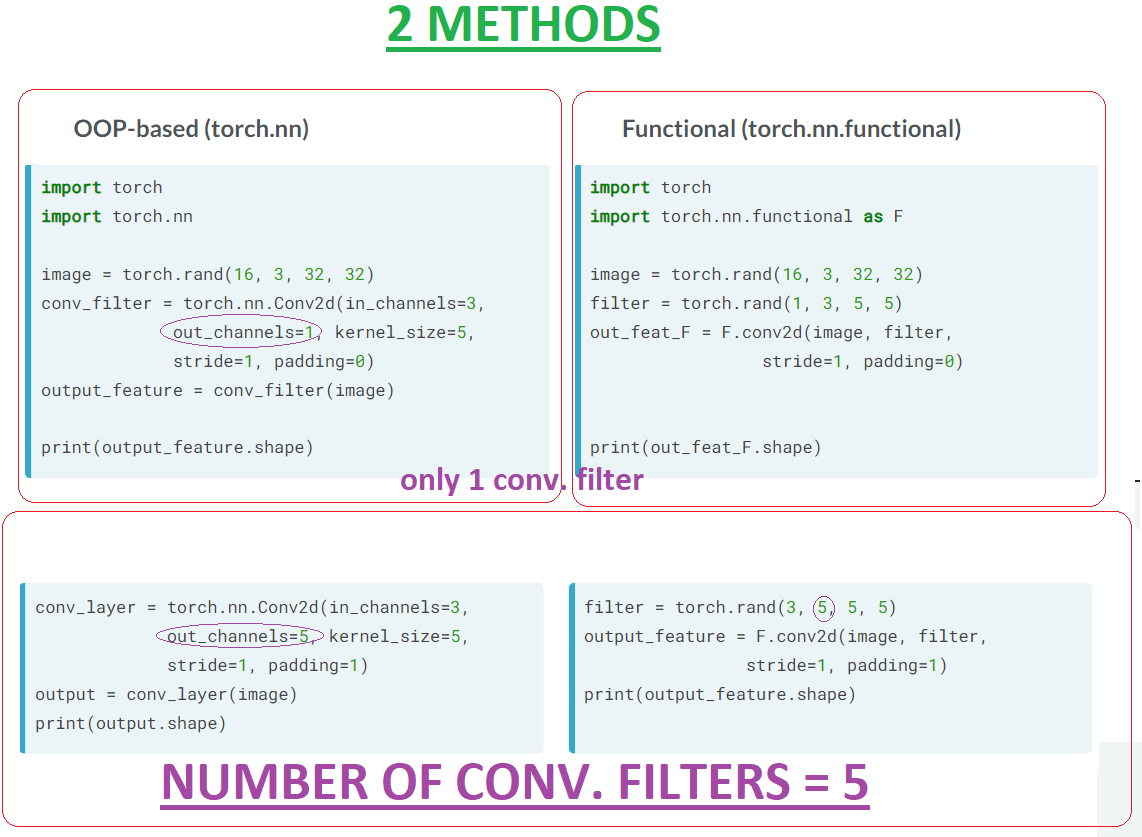

<div class="alert alert-block alert-danger">
<b>Convolution operator - OOP way:::</b> 
</ul>
</div>

In [230]:
# Create 10 random images of shape (1, 28, 28)
images = torch.rand(10, 1, 28, 28)

In [231]:
# Build 6 conv. filters
conv_filters = torch.nn.Conv2d(in_channels=1,
                               out_channels=6, 
                               kernel_size=3, 
                               stride=1,
                               padding=1)

In [232]:
# Convolve the image with the filters
output_feature = conv_filters(images)
print(output_feature.shape)

torch.Size([10, 6, 28, 28])


<div class="alert alert-block alert-danger">
<b>Convolution operator - Functional way ::::::</b> 
</ul>
</div>

In [233]:
import torch.nn.functional as F

In [234]:
# Create 10 random images
image = torch.rand(10, 1, 28, 28)

- Create 6 random filters with shape (1, 3, 3)

In [236]:
# Create 6 filters
filters = torch.rand(6, 1, 3, 3)

# Convolve the image with the filters
output_feature = F.conv2d(image, 
                          filters, 
                          stride=1, 
                          padding=1)

print(output_feature.shape)

torch.Size([10, 6, 28, 28])


## Pooling

- Method of feature selection (choosing/ combining the most dominant features)
- Model becomes invariant to translations
- We obtaain smaller feature maps ( thus computational efficient)

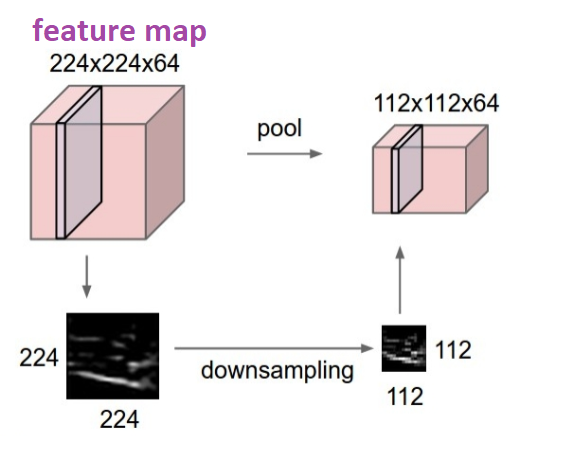

<div class="alert alert-block alert-danger">
<ul>
    <li>Average Pooling</li>
    <li>Max Pooling</li>
</ul>
</div>

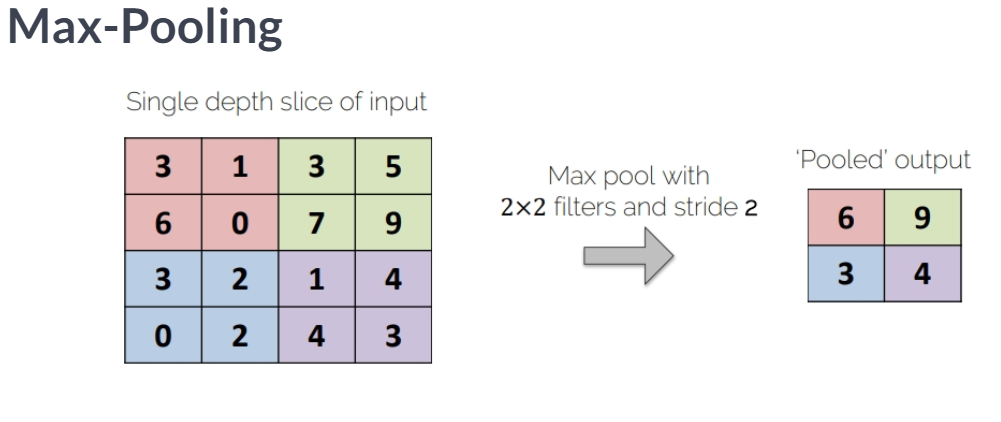

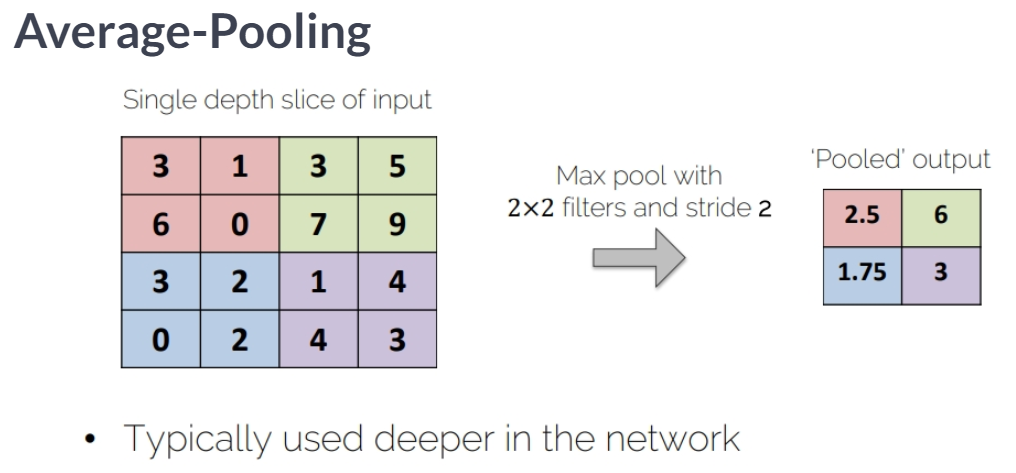

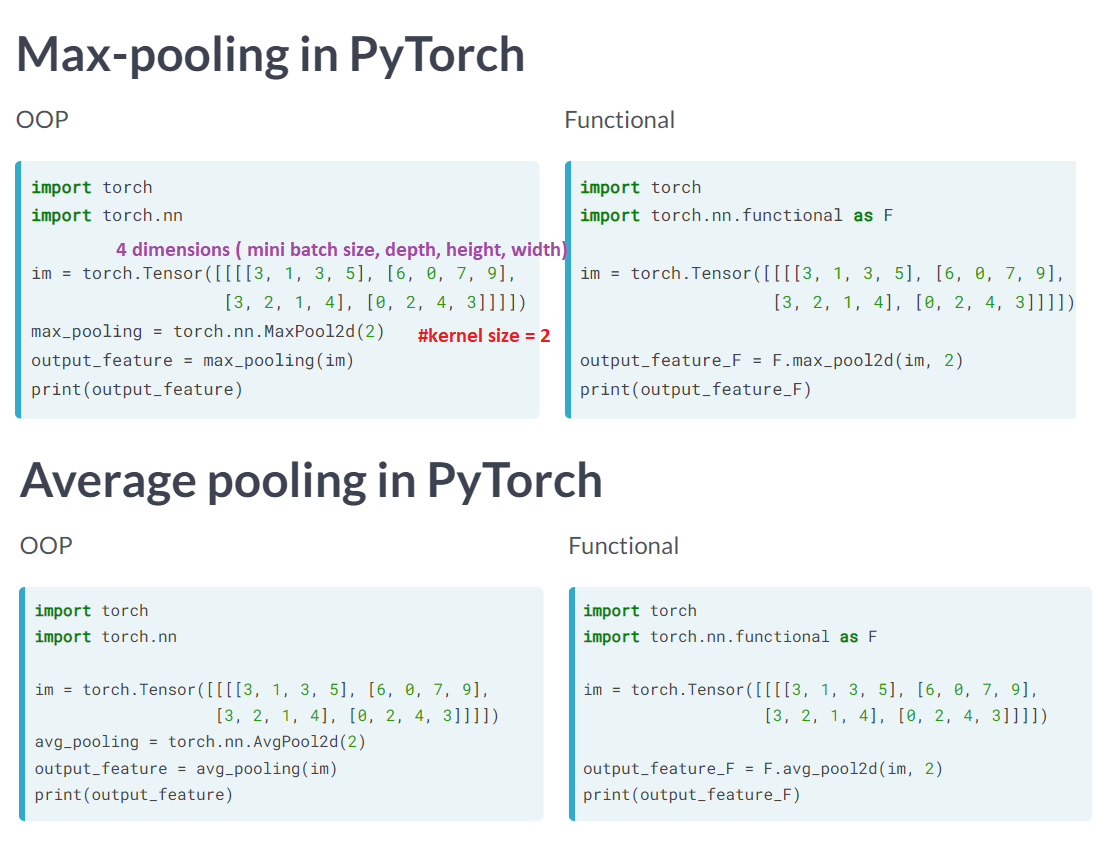

In [240]:
im = torch.tensor([[[[ 8.,  1.,  2.,  5.,  3.,  1.],
          [ 6.,  0.,  0., -5.,  7.,  9.],
          [ 1.,  9., -1., -2.,  2.,  6.],
          [ 0.,  4.,  2., -3.,  4.,  3.],
          [ 2., -1.,  4., -1., -2.,  3.],
          [ 2., -4.,  5.,  9., -7.,  8.]]]])

OOP :

In [244]:
# Build a pooling operator with size `2`.
max_pooling = torch.nn.MaxPool2d(2)
# Apply the pooling operator
output_feature = max_pooling(im)

Functional Module:

In [241]:
# Use pooling operator in the image
output_feature_F = F.max_pool2d(im, 2)

In [242]:
# print the results of both cases
print(output_feature)
print(output_feature_F)

tensor([[[[8., 5., 9.],
          [9., 2., 6.],
          [2., 9., 8.]]]])
tensor([[[[8., 5., 9.],
          [9., 2., 6.],
          [2., 9., 8.]]]])


In [245]:
# Build a pooling operator with size `2`.
avg_pooling = torch.nn.AvgPool2d(2)

# Apply the pooling operator
output_feature = avg_pooling(im)

# Use pooling operator in the image
output_feature_F = F.avg_pool2d(im, 2)

# print the results of both cases
print(output_feature)
print(output_feature_F)

tensor([[[[ 3.7500,  0.5000,  5.0000],
          [ 3.5000, -1.0000,  3.7500],
          [-0.2500,  4.2500,  0.5000]]]])
tensor([[[[ 3.7500,  0.5000,  5.0000],
          [ 3.5000, -1.0000,  3.7500],
          [-0.2500,  4.2500,  0.5000]]]])


## Building CNN

### Setup

Data-set  : MNIST  <br><br>
Architecture:: <br>
- 2 convolutional layers, each followed by a ReLU nonlinearity, and a fully connected layer.

- NB: We need 2 pooling layers, but we only need to instantiate a pooling layer once, because each pooling layer will have the same configuration. Instead, we will use self.pool twice in the next exercise.

- Deduct the first size of the weights for the fully connected layers. Images start with shape (1, 28, 28) and two pooling operators (each halving the size of the image) are performed. What is the size of the image fed to the input layer (heigh * width * number_of_channels) <br><br>

- In line 16, number_of_channels is the same as the number of channels in self.conv2.
MNIST images are black and white, so they contain one channel.

In [247]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
         # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU()
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Instantiate a fully connected layer
        self.fc = nn.Linear(7 * 7 * 10, 10)  #10 classes in MNIST dataset
        
    def forward(self, x):
        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)
        ###Transform the feature map from 4 dimensional to 2 dimensional space.
        ###The first dimension contains the batch size (-1), 
        ###deduct the second dimension, by multiplying the values for height, width and depth

        # Apply the fully connected layer and return the result
        return self.fc(x)

### Training

In [249]:
net = Net()

In [250]:
for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    # Compute the forward pass
    outputs = net(inputs)
        
    # Compute the loss function
    loss = criterion(outputs, labels)
        
    # Compute the gradients
    loss.backward()
        
    # Update the weights
    optimizer.step()

- Remember that torch.max() takes two arguments: -output.data - the tensor which contains the data AND
<br>
Either 1 to do argmax or 0 to do max.

In [266]:
# Iterate over the data in the test_loader
for i, data in enumerate(test_loader):

    # Get the image and label from data
    image, label = data

    # Make a forward pass in the net with your image
    output = net(image)

    # Argmax the results of the net
    _, predicted = torch.max(output.data, 1)
    if predicted == label:
        print("Yipes, your net made the right prediction " + str(predicted))
    else:
        print("Your net prediction was " + str(predicted) + ", but the correct label is: " + str(label))

RuntimeError: bool value of Tensor with more than one value is ambiguous

## Sequential Module

- Easier to Debug

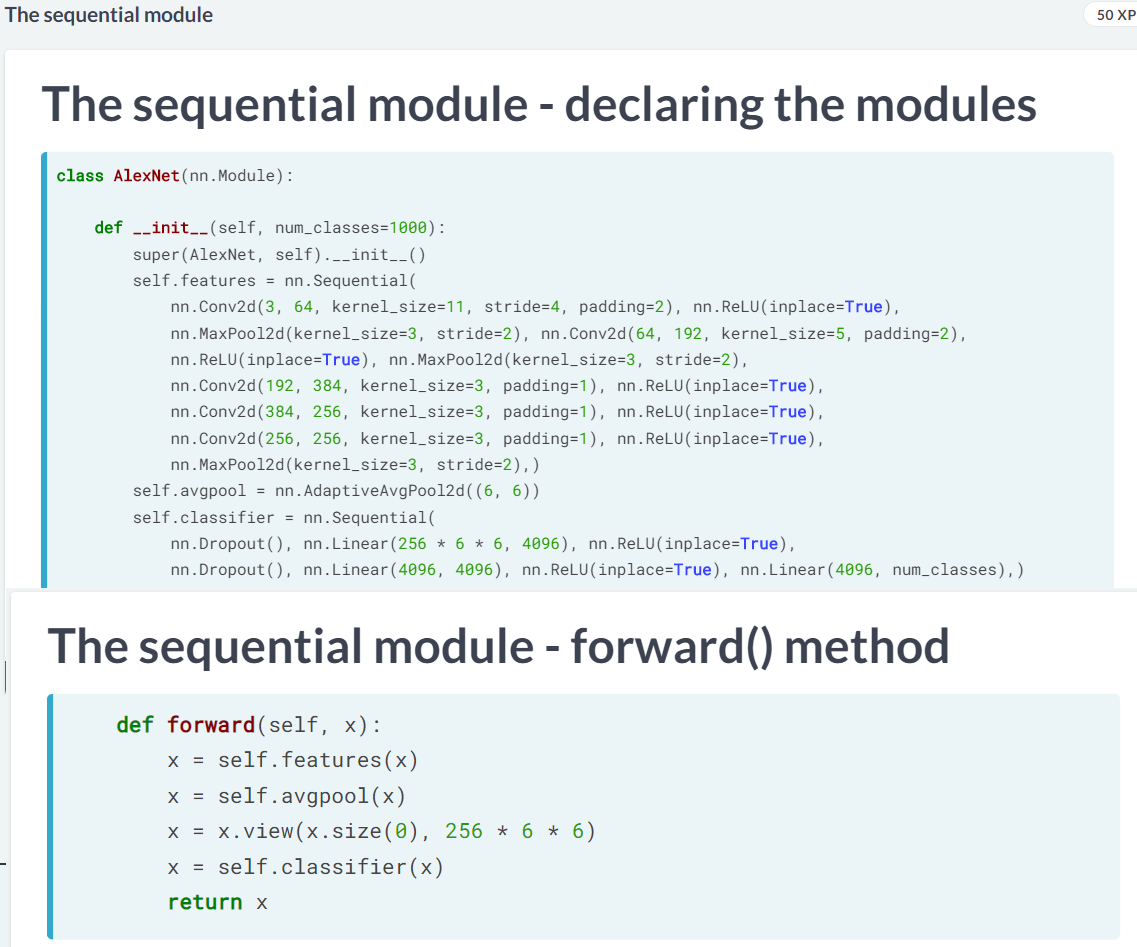

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Traditional Way:</b> 

</p>

- Lengthy and hard to debug

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1)

        self.relu = nn.ReLU()

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(7 * 7 * 40, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 10) 

    def forward():
        x = self.relu(self.conv1(x))
        x = self.relu(self.pool(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.relu(self.pool(self.conv4(x)))
        x = x.view(-1, 7 * 7 * 40)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Sequential Module Way:</b> 

</p>

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Declare all the layers for feature extraction
        self.features = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1), 
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1), 
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1),
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True))
        
        # Declare all the layers for classification
        self.classifier = nn.Sequential(nn.Linear(7 * 7 * 40, 1024), nn.ReLU(inplace=True),
                                       	nn.Linear(1024, 2048), nn.ReLU(inplace=True),
                                        nn.Linear(2048, 10))
        
    def forward(self, x):
          # Apply the feature extractor in the input
        x = self.features(x)
        
        # Squeeze the three spatial dimensions in one
        x = x.view(-1, 7 * 7 * 40)
        
        # Classify the images
        x = self.classifier(x)
        return x

## Improving CNN's

### The problem of overfitting


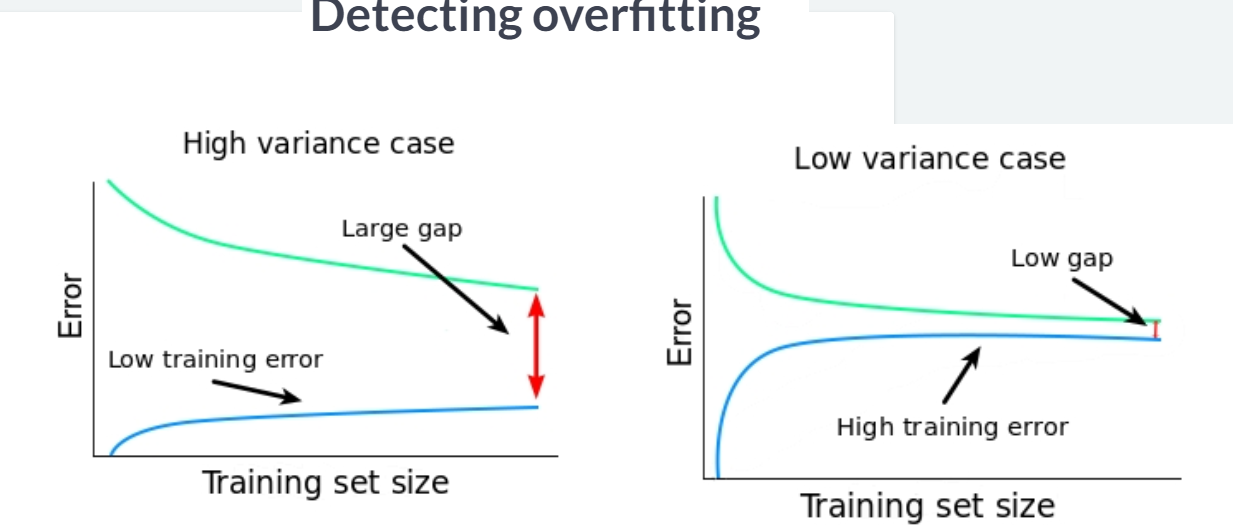

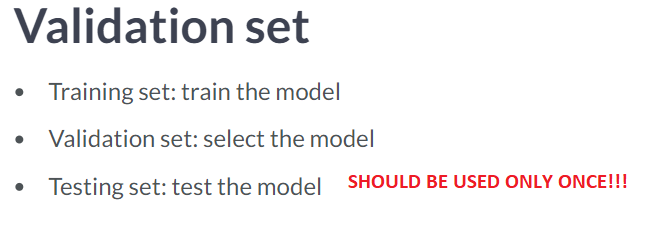

- It is your job as a data scientist to split the dataset into training, testing and validation. The easiest (and most used) way of doing so is to do a random splitting of the dataset. In PyTorch, that can be done using SubsetRandomSampler object. You are going to split the training part of MNIST dataset into training and validation. After randomly shuffling the dataset, use the first 55000 points for training, and the remaining 5000 points for validation.

- Non overlapping sets

<b> Train = True </b>

In [268]:
# Shuffle the indices
indices = np.arange(60000)
np.random.shuffle(indices)

# Build the train loader
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist', download=True, train=True,
                     transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
                     batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[:55000]))

# Build the validation loader
val_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist', download=True, train=True,
                   transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
                   batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[55000:]))

0it [00:00, ?it/s]

9920512it [00:01, 7434042.30it/s]                             


Extracting mnist\MNIST\raw\train-images-idx3-ubyte.gz to mnist\MNIST\raw


0it [00:00, ?it/s]

32768it [00:00, 104318.86it/s]           
0it [00:00, ?it/s]

Extracting mnist\MNIST\raw\train-labels-idx1-ubyte.gz to mnist\MNIST\raw


1654784it [00:00, 2090423.24it/s]                            
0it [00:00, ?it/s]

Extracting mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to mnist\MNIST\raw


8192it [00:00, 33949.59it/s]            


Extracting mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist\MNIST\raw
Processing...
Done!


Detecting overfitting :
- You should use the testing set only to do the final evaluation, not to detect overfitting.
- The accuracy in the training set is 90%, the accuracy in the validation set is 70%.
press


### Regularization techniques


#### L-2 Regularization

- add <b> weight_decay </b> term in the optimizer

In [ ]:
# Instantiate the network
model = Net()

# Instantiate the cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Instantiate the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.001)

#### DropOut

- For the first hidden layer use 200 units, for the second hidden layer use 500 units, and for the output layer use 10 units (one for each class). For the activation function, use ReLU. Use .Dropout() with strength 0.5, between the first and second hidden layer. Use the sequential module, with the order being: fully-connected, activation, dropout, fully-connected, activation, fully-connected.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        
        # Define all the parameters of the net
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(200, 500),
            nn.ReLU(inplace=True),
            nn.Linear(500, 10))
        
    def forward(self, x):
    
    	# Do the forward pass
        return self.classifier(x)

 - Typically, dropout is applied in fully-connected neural networks, or in the fully-connected layers of a convolutional neural network

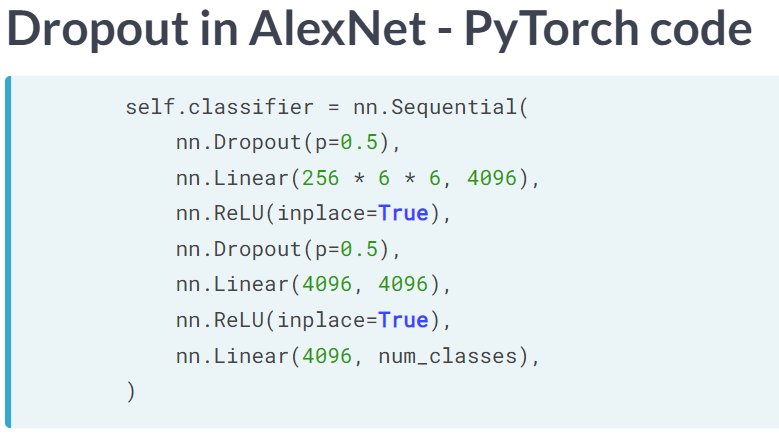

#### Batch-Normalization

- Computes the mean and variance of the minibatch for each feature , and normalizes the features

- The feature extraction part of the CNN will contain the following modules (in order): convolution, max-pool, activation, batch-norm, convolution, max-pool, relu, batch-norm. <br> <br>

- The first convolutional layer will contain 10 output channels, while the second will contain 20 output channels. As always, we are going to use MNIST dataset, with images having shape (28, 28) in grayscale format (1 channel). In all cases, the size of the filter should be 3, the stride should be 1 and the padding should be 1.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Implement the sequential module for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(10),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(20))
        
        # Implement the fully connected layer for classification
        self.fc = nn.Linear(in_features=7*7*20, out_features=10)

#### Early Stopping

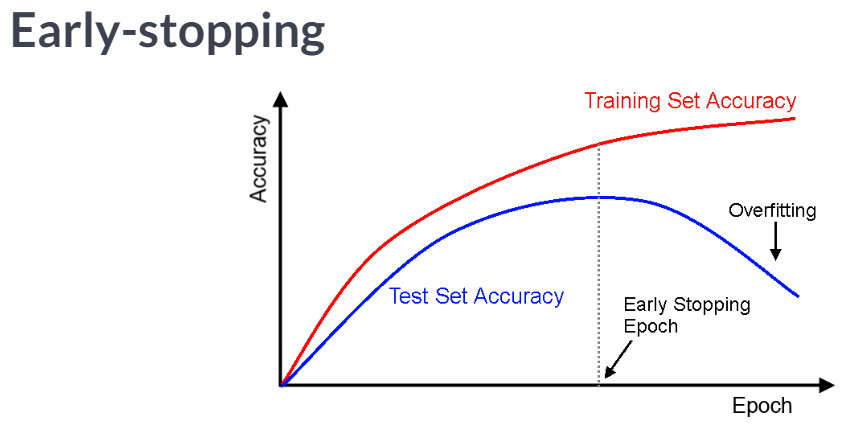

- Important to save the network

## TRANSFER LEARNING

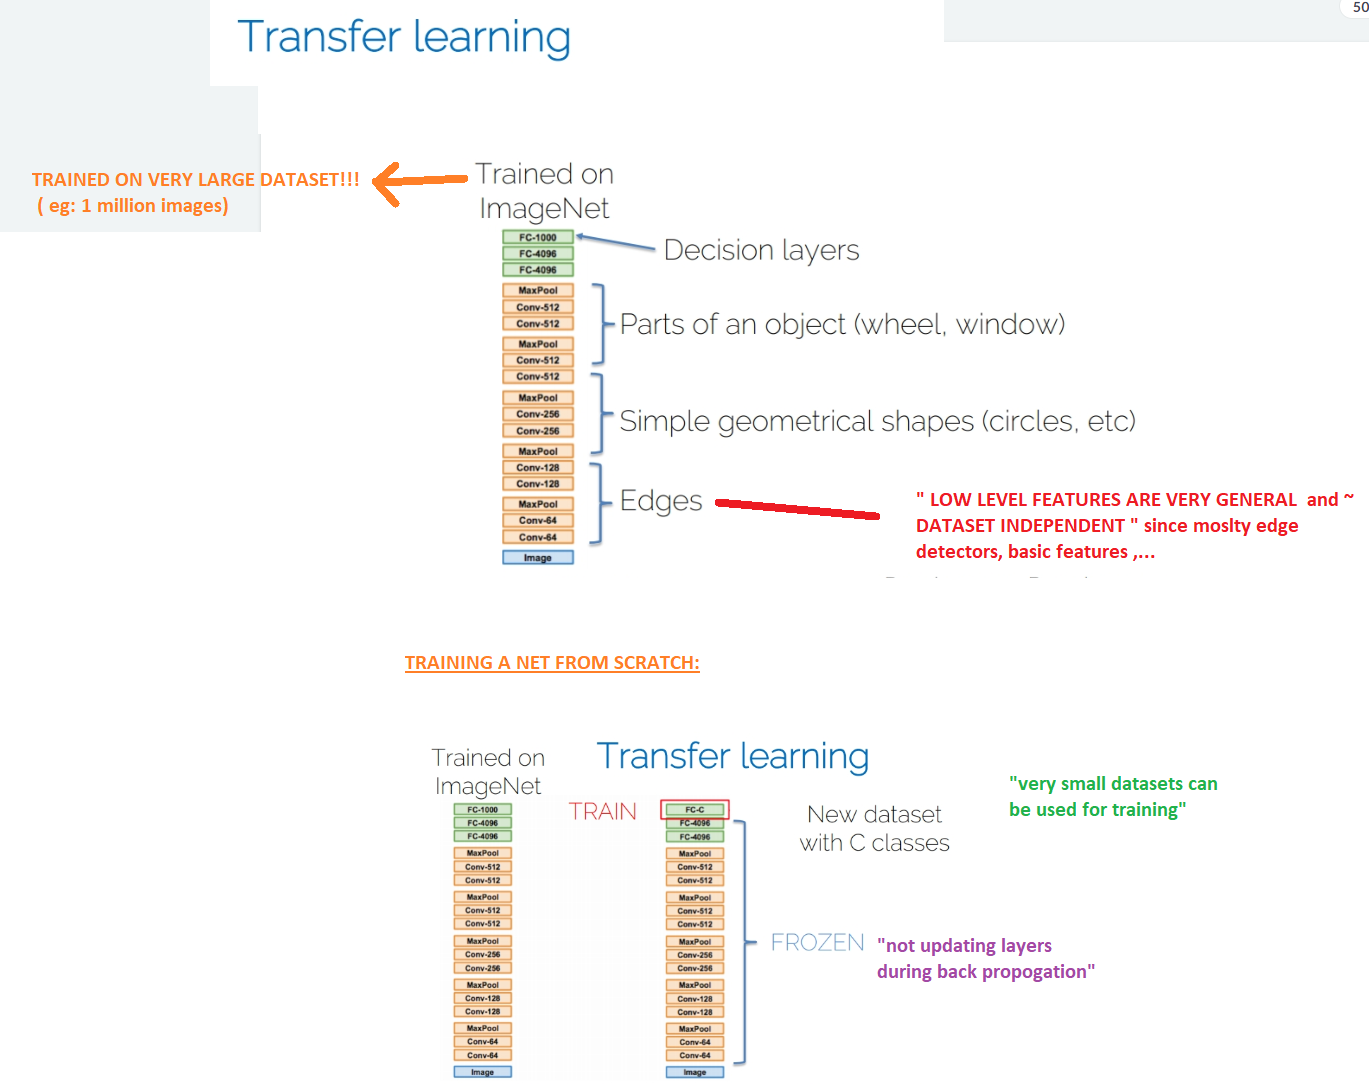

- can be used when we have very small datasets

### Using a Previoulsy Tarined Model

Finetuning a CNN::::

- Previously, you trained a model to classify handwritten digits and saved the model parameters to my_net.pth. Now you're going to classify handwritten letters, but you have a smaller training set.
<br><br>
- In the first step, you'll create a new model using this training set, but the accuracy will be poor. Next, you'll perform the same training, but you'll start with the parameters from your digit classifying model. Even though digits and letters are two different classification problems, you'll see that using information from your previous model will dramatically improve this one.

Net(
  (conv1): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=25088, out_features=10, bias=True)
)


- Change the number of output units, to the number of classifications for letters:::

In [ ]:
# Create a new model
model = Net()
# Change the number of output units
model.fc = nn.Linear(7 * 7 * 512, 26)  #.fc = final layer of the model
# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is: " + str(model.eval()))

<b> Repeat the training process, but first load the digit classifier parameters from my_net.pth. </b>

In [ ]:
# Create a new model
model = Net()

# Load the parameters from the old model
model.load_state_dict(torch.load('my_net.pth'))  #old model is saved as mu_net.pth

# Change the number of out channels
model.fc = nn.Linear(7 * 7 * 512, 26)

# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is: " + str(model.eval()))

### TorchVision Module

- You already finetuned a net you had pretrained. In practice though, it is very common to finetune CNNs that someone else (typically the library's developers) have pretrained in ImageNet. Big networks still take a lot of time to be trained on large datasets, and maybe you cannot afford to train a large network on a dataset of 1.2 million images on your laptop.
<br> <br>
Instead, you can simply download the network and finetune it on your dataset. That's what you will do right now. You are going to assume that you have a personal dataset, containing the images from all your last 7 holidays. You want to build a neural network that can classify each image depending on the holiday it comes from. However, since the dataset is so small, you need to use the finetuning technique.

In [270]:
# Import the module
import torchvision

# Download resnet18
model = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Ashwin/.cache\torch\checkpoints\resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 12.4MB/s]


In [ ]:
# Import the module
import torchvision

# Download resnet18
model = torchvision.models.resnet18(pretrained=True)

# Freeze all the layers bar the last one
for param in model.parameters():  
    param.requires_grad = False  #FREEZING THE LAYERS

# Change the number of output units
model.fc = nn.Linear(512, 7)

## Alex Net

ALEXNET::

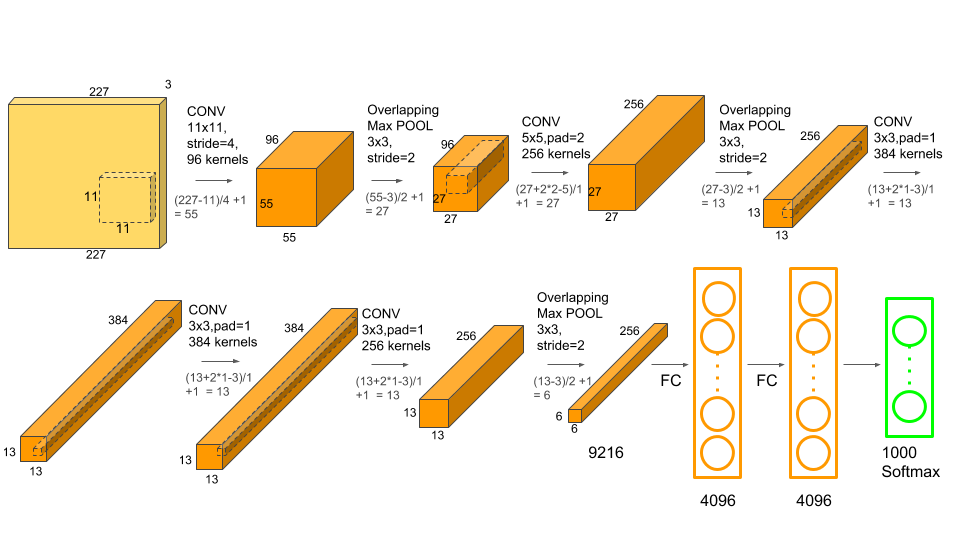

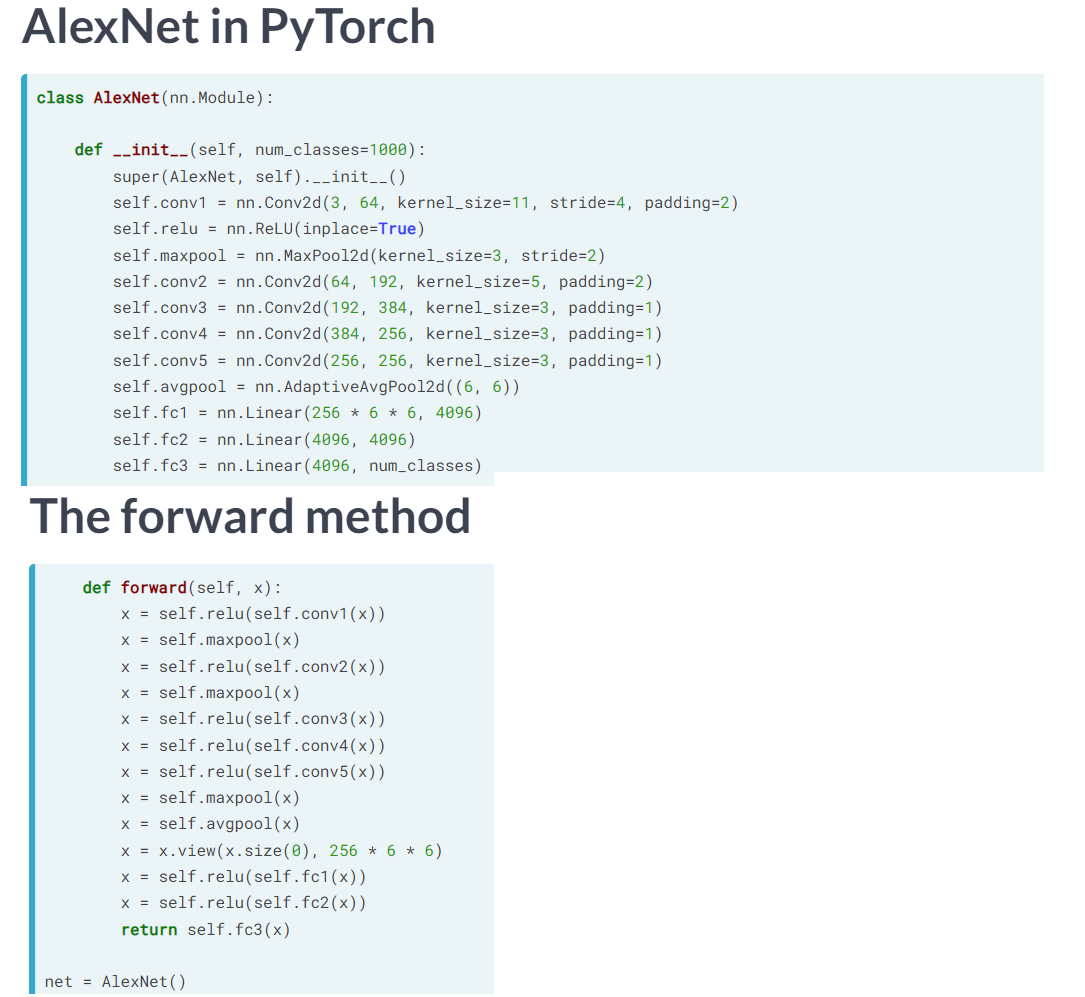

In [ ]:
# CNN

## Simple CNN for MNIST

![image.png](attachment:image.png)

``` python
nn.Conv2d(number_of_input_channels,  #Ex: For grey Scale = 1, for RGB = 3
          number_of_output_channels, #Ex: Number of Feature maps
          kernel_size=5)      #Ex: 5 x 5 kernel

```

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch.utils import data
from torch import cuda

##DATA LOADER

# Training settings
batch_size = 64

device = 'cuda' if cuda.is_available() else 'cpu'

print(f'Training MNIST Model on {device}\n{"=" * 44}')

# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  #MNIST is grey scale , this 1 channel
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)  #10 possible outputs (!!!!!!!!!HOW TO CALCUL:ATE THIS 320???)
                                    #INput any random number and run the model, you'll get an error

    def forward(self, x):
        in_size = x.size(0)  #BATCH SIZE
        x = F.relu(self.mp(self.conv1(x)))  #Conv - > Max Pooling - > RELU
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor before passing into Fully connected Layer
                                #rows = batches , columns = Falttened Tensor
        x = self.fc(x)
        return F.log_softmax(x) #Log Softmax

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>How to Find the DImension of the last layer before final output ?? </b> <br>
    - Keep any randoim number and run the model , you'll get a size mismatch erro , use that number (CORRECT VALUE)

</p>

![image.png](attachment:image.png)

- <b> NOTE: [64 x 320] [100 x 10] , thus the correct value is 320!!!!!!!!!

model = Net()

print(model)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

for epoch in range(1, 2):
    train(epoch)
    test()

## INCEPTION MODULE

![image.png](attachment:image.png)

<b> Why Use Inception Model ?</b> 
- SIgnificant Reduction in number of computations

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>NOTE: When we have a complicated model, split in to two seperate classes for simplicity</b> 

</p>

## DAT A LOADER
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class InceptionA(nn.Module):

    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = nn.Conv2d(24, 24, kernel_size=3, padding=1)

        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(88, 20, kernel_size=5)

        self.incept1 = InceptionA(in_channels=10)
        self.incept2 = InceptionA(in_channels=20)

        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(1408, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)

model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        #if batch_idx % 10 == 0:
            #print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
               # epoch, batch_idx * len(data), len(train_loader.dataset),
               # 100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).item()
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

for epoch in range(1, 2):
    train(epoch)
    test()

## Depth Of Network? (Res-Net)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Convolutional Operator

![image.png](attachment:image.png)

<div class="alert alert-block alert-danger">
<b>Convolution operator - OOP way:::</b> 
</ul>
</div>

# Create 10 random images of shape (1, 28, 28)
images = torch.rand(10, 1, 28, 28)

# Build 6 conv. filters
conv_filters = torch.nn.Conv2d(in_channels=1,
                               out_channels=6, 
                               kernel_size=3, 
                               stride=1,
                               padding=1)

# Convolve the image with the filters
output_feature = conv_filters(images)
print(output_feature.shape)

<div class="alert alert-block alert-danger">
<b>Convolution operator - Functional way ::::::</b> 
</ul>
</div>

import torch.nn.functional as F

# Create 10 random images
image = torch.rand(10, 1, 28, 28)

- Create 6 random filters with shape (1, 3, 3)

# Create 6 filters
filters = torch.rand(6, 1, 3, 3)

# Convolve the image with the filters
output_feature = F.conv2d(image, 
                          filters, 
                          stride=1, 
                          padding=1)

print(output_feature.shape)

## Pooling

- Method of feature selection (choosing/ combining the most dominant features)
- Model becomes invariant to translations
- We obtaain smaller feature maps ( thus computational efficient)

![image.png](attachment:image.png)

<div class="alert alert-block alert-danger">
<ul>
    <li>Average Pooling</li>
    <li>Max Pooling</li>
</ul>
</div>

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

im = torch.tensor([[[[ 8.,  1.,  2.,  5.,  3.,  1.],
          [ 6.,  0.,  0., -5.,  7.,  9.],
          [ 1.,  9., -1., -2.,  2.,  6.],
          [ 0.,  4.,  2., -3.,  4.,  3.],
          [ 2., -1.,  4., -1., -2.,  3.],
          [ 2., -4.,  5.,  9., -7.,  8.]]]])

OOP :

# Build a pooling operator with size `2`.
max_pooling = torch.nn.MaxPool2d(2)
# Apply the pooling operator
output_feature = max_pooling(im)

Functional Module:

# Use pooling operator in the image
output_feature_F = F.max_pool2d(im, 2)

# print the results of both cases
print(output_feature)
print(output_feature_F)

# Build a pooling operator with size `2`.
avg_pooling = torch.nn.AvgPool2d(2)

# Apply the pooling operator
output_feature = avg_pooling(im)

# Use pooling operator in the image
output_feature_F = F.avg_pool2d(im, 2)

# print the results of both cases
print(output_feature)
print(output_feature_F)

## Building CNN

### Setup

Data-set  : MNIST  <br><br>
Architecture:: <br>
- 2 convolutional layers, each followed by a ReLU nonlinearity, and a fully connected layer.

- NB: We need 2 pooling layers, but we only need to instantiate a pooling layer once, because each pooling layer will have the same configuration. Instead, we will use self.pool twice in the next exercise.

- Deduct the first size of the weights for the fully connected layers. Images start with shape (1, 28, 28) and two pooling operators (each halving the size of the image) are performed. What is the size of the image fed to the input layer (heigh * width * number_of_channels) <br><br>

- In line 16, number_of_channels is the same as the number of channels in self.conv2.
MNIST images are black and white, so they contain one channel.

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
         # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU()
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Instantiate a fully connected layer
        self.fc = nn.Linear(7 * 7 * 10, 10)  #10 classes in MNIST dataset
        
    def forward(self, x):
        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)
        ###Transform the feature map from 4 dimensional to 2 dimensional space.
        ###The first dimension contains the batch size (-1), 
        ###deduct the second dimension, by multiplying the values for height, width and depth

        # Apply the fully connected layer and return the result
        return self.fc(x)

### Training

net = Net()

for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    # Compute the forward pass
    outputs = net(inputs)
        
    # Compute the loss function
    loss = criterion(outputs, labels)
        
    # Compute the gradients
    loss.backward()
        
    # Update the weights
    optimizer.step()

- Remember that torch.max() takes two arguments: -output.data - the tensor which contains the data AND
<br>
Either 1 to do argmax or 0 to do max.

# Iterate over the data in the test_loader
for i, data in enumerate(test_loader):

    # Get the image and label from data
    image, label = data

    # Make a forward pass in the net with your image
    output = net(image)

    # Argmax the results of the net
    _, predicted = torch.max(output.data, 1)
    if predicted == label:
        print("Yipes, your net made the right prediction " + str(predicted))
    else:
        print("Your net prediction was " + str(predicted) + ", but the correct label is: " + str(label))

## Sequential Module

- Easier to Debug

![image.png](attachment:image.png)

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Traditional Way:</b> 

</p>

- Lengthy and hard to debug

class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1)

        self.relu = nn.ReLU()

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(7 * 7 * 40, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 10) 

    def forward():
        x = self.relu(self.conv1(x))
        x = self.relu(self.pool(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.relu(self.pool(self.conv4(x)))
        x = x.view(-1, 7 * 7 * 40)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Sequebtial Module Way:</b> 

</p>

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Declare all the layers for feature extraction
        self.features = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1), 
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1), 
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1),
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True))
        
        # Declare all the layers for classification
        self.classifier = nn.Sequential(nn.Linear(7 * 7 * 40, 1024), nn.ReLU(inplace=True),
                                       	nn.Linear(1024, 2048), nn.ReLU(inplace=True),
                                        nn.Linear(2048, 10))
        
    def forward(self, x):
          # Apply the feature extractor in the input
        x = self.features(x)
        
        # Squeeze the three spatial dimensions in one
        x = x.view(-1, 7 * 7 * 40)
        
        # Classify the images
        x = self.classifier(x)
        return x



## Improving CNN's

### The problem of overfitting


![image.png](attachment:image.png)

![image.png](attachment:image.png)

- It is your job as a data scientist to split the dataset into training, testing and validation. The easiest (and most used) way of doing so is to do a random splitting of the dataset. In PyTorch, that can be done using SubsetRandomSampler object. You are going to split the training part of MNIST dataset into training and validation. After randomly shuffling the dataset, use the first 55000 points for training, and the remaining 5000 points for validation.

- Non overlapping sets

<b> Train = True </b>

# Shuffle the indices
indices = np.arange(60000)
np.random.shuffle(indices)

# Build the train loader
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist', download=True, train=True,
                     transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
                     batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[:55000]))

# Build the validation loader
val_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist', download=True, train=True,
                   transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
                   batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[55000:]))

Detecting overfitting :
- You should use the testing set only to do the final evaluation, not to detect overfitting.
- The accuracy in the training set is 90%, the accuracy in the validation set is 70%.
press


### Regularization techniques


#### L-2 Regularization

- add <b> weight_decay </b> term in the optimizer

# Instantiate the network
model = Net()

# Instantiate the cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Instantiate the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.001)

#### DropOut

- For the first hidden layer use 200 units, for the second hidden layer use 500 units, and for the output layer use 10 units (one for each class). For the activation function, use ReLU. Use .Dropout() with strength 0.5, between the first and second hidden layer. Use the sequential module, with the order being: fully-connected, activation, dropout, fully-connected, activation, fully-connected.

class Net(nn.Module):
    def __init__(self):
        
        # Define all the parameters of the net
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(200, 500),
            nn.ReLU(inplace=True),
            nn.Linear(500, 10))
        
    def forward(self, x):
    
    	# Do the forward pass
        return self.classifier(x)

 - Typically, dropout is applied in fully-connected neural networks, or in the fully-connected layers of a convolutional neural network

![image.png](attachment:image.png)

#### Batch-Normalization

- Computes the mean and variance of the minibatch for each feature , and normalizes the features

- The feature extraction part of the CNN will contain the following modules (in order): convolution, max-pool, activation, batch-norm, convolution, max-pool, relu, batch-norm. <br> <br>

- The first convolutional layer will contain 10 output channels, while the second will contain 20 output channels. As always, we are going to use MNIST dataset, with images having shape (28, 28) in grayscale format (1 channel). In all cases, the size of the filter should be 3, the stride should be 1 and the padding should be 1.

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Implement the sequential module for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(10),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(20))
        
        # Implement the fully connected layer for classification
        self.fc = nn.Linear(in_features=7*7*20, out_features=10)

#### Early Stopping

![image.png](attachment:image.png)

- Important to save the network

## TRANSFER LEARNING

![image.png](attachment:image.png)

- can be used when we have very small datasets

### Using a Previoulsy Tarined Model

Finetuning a CNN::::

- Previously, you trained a model to classify handwritten digits and saved the model parameters to my_net.pth. Now you're going to classify handwritten letters, but you have a smaller training set.
<br><br>
- In the first step, you'll create a new model using this training set, but the accuracy will be poor. Next, you'll perform the same training, but you'll start with the parameters from your digit classifying model. Even though digits and letters are two different classification problems, you'll see that using information from your previous model will dramatically improve this one.

Net(
  (conv1): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=25088, out_features=10, bias=True)
)


- Change the number of output units, to the number of classifications for letters:::

# Create a new model
model = Net()
# Change the number of output units
model.fc = nn.Linear(7 * 7 * 512, 26)  #.fc = final layer of the model
# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is: " + str(model.eval()))

<b> Repeat the training process, but first load the digit classifier parameters from my_net.pth. </b>

# Create a new model
model = Net()

# Load the parameters from the old model
model.load_state_dict(torch.load('my_net.pth'))  #old model is saved as mu_net.pth

# Change the number of out channels
model.fc = nn.Linear(7 * 7 * 512, 26)

# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is: " + str(model.eval()))

### TorchVision Module

- You already finetuned a net you had pretrained. In practice though, it is very common to finetune CNNs that someone else (typically the library's developers) have pretrained in ImageNet. Big networks still take a lot of time to be trained on large datasets, and maybe you cannot afford to train a large network on a dataset of 1.2 million images on your laptop.
<br> <br>
Instead, you can simply download the network and finetune it on your dataset. That's what you will do right now. You are going to assume that you have a personal dataset, containing the images from all your last 7 holidays. You want to build a neural network that can classify each image depending on the holiday it comes from. However, since the dataset is so small, you need to use the finetuning technique.

# Import the module
import torchvision

# Download resnet18
model = torchvision.models.resnet18(pretrained=True)

# Import the module
import torchvision

# Download resnet18
model = torchvision.models.resnet18(pretrained=True)

# Freeze all the layers bar the last one
for param in model.parameters():  
    param.requires_grad = False  #FREEZING THE LAYERS

# Change the number of output units
model.fc = nn.Linear(512, 7)

## Alex Net

ALEXNET::

![image.png](attachment:image.png)

![image.png](attachment:image.png)